# SVM Classfication model
### - GIS Partial Discharge Signal: Noise , Surface PD, Particle PD
### - Sensor: PD SENSOR

## 1. Python Module

In [1]:
# 경로 설정 패키지
import os

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #정규화 패키지

# 기계학습 모델 및 평가 패키지
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from scipy.stats import skew, kurtosis
from tqdm import tqdm

# 시각화 패키지
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정 
plt.rc('font', family='Malgun Gothic')

## 2. Data Pre-processing

In [2]:
# Noise_data

os.chdir("C:/Users/taeyu/PRPD data Test/data/noise") #데이터 경로
print(os.getcwd())

data_name = []

for i in range(30):
    data = 'noise ({0}).csv'.format(i)
    data_name.append(data)

    
    
for j, k in zip(range(0,50),data_name):    
    df = pd.read_csv(k, header=None, index_col = False) # Dataframe 데이터
    test_data= df.to_numpy() # ndarray data
    
    feature_file = np.ones((3600,10), dtype=None, order='C')
    feature_file_mean = np.ones((1,11), dtype=None, order='C')
    
    for a in (range(3600)):
        feature_file[a,0] = skew(test_data[a,0:63]); # 60hZ 반주기 왜도(Positive)
        feature_file[a,1] = skew(test_data[a,64:127]); # 60hZ 반주기 왜도(Negaitive)
        feature_file[a,2] = kurtosis(test_data[a,0:63]); # 60hZ 반주기 첨도(Positive)
        feature_file[a,3] = kurtosis(test_data[a,64:127]); # 60hZ 반주기 첨도(Negaitive)
        feature_file[a,4] = np.max(test_data[a,0:63]); # 60hZ 반주기 최대값(Positive)
        feature_file[a,5] = np.max(test_data[a,64:127]); # 60hZ 반주기 최대값(Negaitive)
        feature_file[a,6] = np.mean(test_data[a,0:63]); # 60hZ 반주기 평균(Positive)
        feature_file[a,7] = np.mean(test_data[a,64:127]); # 60hZ 반주기 평균(Negaitive)
        feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40); # 60hZ 반주기 PD 신호 개수, threshhold 수정 
        feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40); # 60hZ 반주기 PD 신호 개수, threshhold 수정 
        
        feature_file_mean[0,0] = np.mean(feature_file[:,0]); #3600 사이클 평균 
        feature_file_mean[0,1] = np.mean(feature_file[:,1]); 
        feature_file_mean[0,2] = np.mean(feature_file[:,2]);
        feature_file_mean[0,3] = np.mean(feature_file[:,3]);
        feature_file_mean[0,4] = np.mean(feature_file[:,4]);
        feature_file_mean[0,5] = np.mean(feature_file[:,5]);
        feature_file_mean[0,6] = np.mean(feature_file[:,6]);
        feature_file_mean[0,7] = np.mean(feature_file[:,7]);
        feature_file_mean[0,8] = np.mean(feature_file[:,8]);
        feature_file_mean[0,9] = np.mean(feature_file[:,9]);
        feature_file_mean[0,10] = 0 # Noise 라벨링 
        
    globals()['prpd_{}'.format(j)] = pd.DataFrame(feature_file_mean);


df_noise = pd.concat([prpd_0, prpd_1, prpd_2, prpd_3, prpd_4, prpd_5, prpd_6, prpd_7, prpd_8, prpd_9, prpd_10, prpd_11,
                         prpd_12, prpd_13,  prpd_14, prpd_15 , prpd_16,  prpd_17, prpd_18, prpd_19, prpd_20,
                         prpd_21 , prpd_22,prpd_23,  prpd_24 , prpd_25, prpd_26,  prpd_27,  prpd_28, prpd_29])

C:\Users\taeyu\PRPD data Test\data\noise


In [4]:
# Surface_data

os.chdir("C:/Users/taeyu/PRPD data Test/data/surface") 
print(os.getcwd())

data_name = []

for i in range(30):
    data = 'surface ({0}).csv'.format(i)
    data_name.append(data)

    
    
for j, k in zip(range(0,50),data_name):    
    df = pd.read_csv(k, header=None, index_col = False) # Dataframe 데이터
    test_data= df.to_numpy() # ndarray data
    
    feature_file = np.ones((3600,10), dtype=None, order='C')
    feature_file_mean = np.ones((1,11), dtype=None, order='C')
    
    for a in (range(3600)):
        feature_file[a,0] = skew(test_data[a,0:63]);
        feature_file[a,1] = skew(test_data[a,64:127]);
        feature_file[a,2] = kurtosis(test_data[a,0:63]);
        feature_file[a,3] = kurtosis(test_data[a,64:127]);
        feature_file[a,4] = np.max(test_data[a,0:63]);
        feature_file[a,5] = np.max(test_data[a,64:127]);
        feature_file[a,6] = np.mean(test_data[a,0:63]);
        feature_file[a,7] = np.mean(test_data[a,64:127]);
        feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40); #  threshhold 수정
        feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40); #  threshhold 수정
        
        feature_file_mean[0,0] = np.mean(feature_file[:,0]);
        feature_file_mean[0,1] = np.mean(feature_file[:,1]);
        feature_file_mean[0,2] = np.mean(feature_file[:,2]);
        feature_file_mean[0,3] = np.mean(feature_file[:,3]);
        feature_file_mean[0,4] = np.mean(feature_file[:,4]);
        feature_file_mean[0,5] = np.mean(feature_file[:,5]);
        feature_file_mean[0,6] = np.mean(feature_file[:,6]);
        feature_file_mean[0,7] = np.mean(feature_file[:,7]);
        feature_file_mean[0,8] = np.mean(feature_file[:,8]);
        feature_file_mean[0,9] = np.mean(feature_file[:,9]);
        feature_file_mean[0,10] = 1 # Surface 라벨링              
        
    globals()['prpd_{}'.format(j)] = pd.DataFrame(feature_file_mean);


df_surface = pd.concat([prpd_0, prpd_1, prpd_2, prpd_3, prpd_4, prpd_5, prpd_6, prpd_7, prpd_8, prpd_9, prpd_10, prpd_11,
                         prpd_12, prpd_13,  prpd_14, prpd_15 , prpd_16,  prpd_17, prpd_18, prpd_19, prpd_20,
                         prpd_21 , prpd_22,prpd_23,  prpd_24 , prpd_25, prpd_26,  prpd_27,  prpd_28, prpd_29]) #수정 

C:\Users\taeyu\PRPD data Test\data\surface


In [5]:
# Particle_data

os.chdir("C:/Users/taeyu/PRPD data Test/data/particle") 
print(os.getcwd())

data_name = []

for i in range(30):
    data = 'particle ({0}).csv'.format(i) 
    data_name.append(data)

    
    
for j, k in zip(range(0,50),data_name):    
    df = pd.read_csv(k, header=None, index_col = False) 
    test_data= df.to_numpy() # ndarray data
    
    feature_file = np.ones((3600,10), dtype=None, order='C')
    feature_file_mean = np.ones((1,11), dtype=None, order='C')
    
    for a in (range(3600)):
        feature_file[a,0] = skew(test_data[a,0:63]);
        feature_file[a,1] = skew(test_data[a,64:127]);
        feature_file[a,2] = kurtosis(test_data[a,0:63]);
        feature_file[a,3] = kurtosis(test_data[a,64:127]);
        feature_file[a,4] = np.max(test_data[a,0:63]);
        feature_file[a,5] = np.max(test_data[a,64:127]);
        feature_file[a,6] = np.mean(test_data[a,0:63]);
        feature_file[a,7] = np.mean(test_data[a,64:127]);
        feature_file[a,8] = np.count_nonzero(test_data[a,0:63]>40); #  threshhold 수정
        feature_file[a,9] = np.count_nonzero(test_data[a,64:127]>40); #  threshhold 수정
        
        feature_file_mean[0,0] = np.mean(feature_file[:,0]);
        feature_file_mean[0,1] = np.mean(feature_file[:,1]);
        feature_file_mean[0,2] = np.mean(feature_file[:,2]);
        feature_file_mean[0,3] = np.mean(feature_file[:,3]);
        feature_file_mean[0,4] = np.mean(feature_file[:,4]);
        feature_file_mean[0,5] = np.mean(feature_file[:,5]);
        feature_file_mean[0,6] = np.mean(feature_file[:,6]);
        feature_file_mean[0,7] = np.mean(feature_file[:,7]);
        feature_file_mean[0,8] = np.mean(feature_file[:,8]);
        feature_file_mean[0,9] = np.mean(feature_file[:,9]);
        feature_file_mean[0,10] = 2 # Particle 라벨링       
        
    globals()['prpd_{}'.format(j)] = pd.DataFrame(feature_file_mean);


df_particle = pd.concat([prpd_0, prpd_1, prpd_2, prpd_3, prpd_4, prpd_5, prpd_6, prpd_7, prpd_8, prpd_9, prpd_10, prpd_11,
                         prpd_12, prpd_13,  prpd_14, prpd_15 , prpd_16,  prpd_17, prpd_18, prpd_19, prpd_20,
                         prpd_21 , prpd_22,prpd_23,  prpd_24 , prpd_25, prpd_26,  prpd_27,  prpd_28, prpd_29]) #수정 

C:\Users\taeyu\PRPD data Test\data\particle


In [6]:
df_particle.head() # 데이터 확인

,0,1,2,3,4,5,6,7,8,9,10
0,0.567045,0.515959,3.234663,3.002908,39.993056,39.460000,23.760608,23.734519,0.306667,0.288333,2.0
0,0.538798,0.527597,3.111290,3.037666,40.222222,40.338889,24.314735,24.344211,0.331389,0.344167,2.0
0,0.495405,0.496435,2.939055,2.959802,39.717222,39.695833,24.068668,24.042659,0.334444,0.355278,2.0
0,0.512526,0.532221,3.091883,3.240748,39.418333,39.851389,23.773108,23.802593,0.320278,0.337778,2.0
0,0.540941,0.541855,3.068137,2.946031,41.355278,41.165833,24.912297,24.891834,0.509167,0.510278,2.0


In [7]:
df_noise.head() # 데이터 확인

,0,1,2,3,4,5,6,7,8,9,10
0,-0.150807,-0.158633,0.065633,0.076435,35.898889,35.853333,23.509158,23.533810,0.399722,0.390556,0.0
0,-0.107208,-0.101258,0.031938,0.046717,36.038611,35.976389,23.505154,23.440728,0.313333,0.305833,0.0
0,-0.187568,-0.186178,-0.038144,-0.053965,36.794444,36.761111,23.949916,23.942857,0.446389,0.451389,0.0
0,-0.172591,-0.175004,-0.034001,-0.002295,36.636111,36.681667,23.894237,23.921398,0.443333,0.443611,0.0
0,-0.156255,-0.156627,0.059400,0.053473,35.563333,35.563889,23.252817,23.238915,0.254167,0.266667,0.0


In [8]:
df_surface.head() # 데이터 확인

,0,1,2,3,4,5,6,7,8,9,10
0,1.442844,1.240729,0.440786,-0.199365,137.732500,145.538333,42.684837,47.311477,14.508056,16.440000,1.0
0,4.834999,4.650689,26.547104,24.967074,112.664444,110.403333,26.387394,26.421609,2.129722,2.291111,1.0
0,4.602775,4.731960,25.192435,25.329000,106.564722,115.289444,26.257822,26.648735,2.038611,2.443056,1.0
0,4.638266,4.800331,25.626348,26.071785,108.128611,116.145556,26.232403,26.628902,1.951944,2.344722,1.0
0,4.627851,4.474606,25.175692,21.967838,108.526389,117.396111,26.417015,27.206014,2.056389,2.647500,1.0


In [9]:
final_data = pd.concat([df_noise, df_surface, df_particle])

os.chdir("C:/Users/taeyu/PRPD data Test") #수정 
print(os.getcwd())

final_data.to_csv('prpd_final.csv', index=False, header=None) 

C:\Users\taeyu\PRPD data Test


## 3. 데이터 불러오기(다변랑 데이터)

In [31]:
df = pd.read_csv('prpd_final.csv', header=None, index_col = False) # Dataframe 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.150807,-0.158633,0.065633,0.076435,35.898889,35.853333,23.509158,23.533810,0.399722,0.390556,0.0
1,-0.107208,-0.101258,0.031938,0.046717,36.038611,35.976389,23.505154,23.440728,0.313333,0.305833,0.0
2,-0.187568,-0.186178,-0.038144,-0.053965,36.794444,36.761111,23.949916,23.942857,0.446389,0.451389,0.0
3,-0.172591,-0.175004,-0.034001,-0.002295,36.636111,36.681667,23.894237,23.921398,0.443333,0.443611,0.0
4,-0.156255,-0.156627,0.059400,0.053473,35.563333,35.563889,23.252817,23.238915,0.254167,0.266667,0.0


In [32]:
df.describe() # 통계량값 확인.

,0,1,2,3,4,5,6,7,8,9,10
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.586189,1.507049,9.154575,8.505928,64.970481,63.728923,25.704884,25.755820,2.138204,2.211827,1.000000
std,1.991755,1.914679,10.726159,10.021947,33.237909,32.420496,2.936462,3.270765,2.395604,2.529062,0.821071
min,-0.190818,-0.200468,-0.051172,-0.199365,33.327500,33.337778,21.813541,21.812271,0.056944,0.053333,0.000000
25%,-0.079969,-0.078888,0.360415,0.341657,36.277986,36.282361,23.694599,23.702877,0.315069,0.315903,0.000000
50%,0.512400,0.511063,3.215106,3.176923,52.465417,52.034861,26.031307,25.986953,1.810833,1.716806,1.000000
75%,4.175414,3.709413,21.888113,18.893567,104.489583,99.900833,27.509994,27.670111,2.742500,3.080972,2.000000
max,4.936425,5.088308,30.116488,29.593029,137.732500,145.538333,42.684837,47.311477,14.508056,16.440000,2.000000


In [33]:
data = df.to_numpy() # ndarray data

In [34]:
X = data[:,0:10] # 독립 변수(feature)
Y = data[:,10] # 종속 변수 (target)

## 4. 데이터 분리(학습 8: 테스트 2) 

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2022) 

## 5. 데이터 정규화

In [36]:
# Scaling

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


## 6. SVM 학습

In [37]:
# SVM 학습 (Best 조건)
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma=0.01, C=1)
classifier.fit(X_train, Y_train)

classifier.score(X_test,Y_test)

## DecisionTreeClassifier() 트리모델
## RandomForestClassifier() 랜덤포레스트
## KNeighborsClassifier() K-최접근 
## SVC(kernel="linear"), 서포터 벡터 머신 
## GaussianNB(), 가우시안 NB
## LogisticRegression(), 로지스트 회귀 

1.0

## 7. 학습결과

In [38]:
# train, test acc

Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)

print('Training Accuracy: {:3f}'. format(acc_train))
print('Testing Accuracy: {:3f}'. format(acc_test))

Training Accuracy: 0.833333
Testing Accuracy: 1.000000


C:\Users\taeyu\.conda\envs\taeyun\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


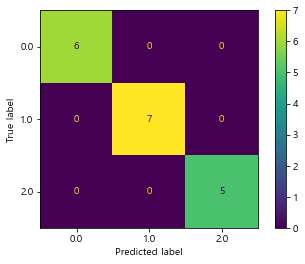

In [42]:
# 혼돈 행렬 (대각선 이외의 값은 예측에 실패한 개수를 표현하기 때문에 대각선 값이 크게 나타나야지 좋다고 볼수 있음
plot_confusion_matrix(classifier, X_test, Y_test)
plt.show()

## 8. 최적화 및 교차 검증(GridSearchCV)

In [40]:
# gridsearch 

from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
  
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose= 3)

  
# fitting the model for grid search
grid.fit(X_train, Y_train);

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.733 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.643 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.933 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.714 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.786 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 2/5] END .......C=100, g

In [41]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}